In [4]:
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [5]:
file_path = Path("Resources/diabetes_binary_health_indicators_BRFSS2015.csv")
health_indicator_df = pd.read_csv(file_path)
health_indicator_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
health_indicator_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
health_indicator_df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [8]:
#To check for null values

null_values=health_indicator_df.isnull().sum().sum()
null_values



0

In [9]:
#To check for the Duplicate value
duplicate_values =health_indicator_df.duplicated().sum()
duplicate_values
#duplicate values was 24206
len(health_indicator_df)
#total count =253680

253680

In [10]:
# To remove the duplicated values
health_indicator_df.drop_duplicates(inplace = True)
len(health_indicator_df)

229474

In [11]:
#Show the subset of the original Dataframe
bmi_heart_df =health_indicator_df[["BMI","HeartDiseaseorAttack"]]
bmi_heart_df

,BMI,HeartDiseaseorAttack
0,40.0,0.0
1,25.0,0.0
2,28.0,0.0
3,27.0,0.0
4,24.0,0.0
...,...,...
253675,45.0,0.0
253676,18.0,0.0
253677,28.0,0.0
253678,23.0,0.0


In [12]:
#BMI and HeartDisease

#Under 18.5  is Underweight
#Between 18.5 and 24.9 - Healthy
#Between 25 and 29.9 - Overweight
#Between 30 and 39.9 Obesity

bh_df = bmi_heart_df
#set range for BMI
bins = [0,18,25,30,100]
#name the ranges
group_names=['Underweight','Healthy','Overweight','Obese']
#new column
bh_df['BMI_GROUP']=pd.cut(bmi_heart_df['BMI'],bins,labels=group_names)

bh_df

C:\Users\61452\AppData\Local\Temp\ipykernel_29080\2465264386.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bh_df['BMI_GROUP']=pd.cut(bmi_heart_df['BMI'],bins,labels=group_names)


,BMI,HeartDiseaseorAttack,BMI_GROUP
0,40.0,0.0,Obese
1,25.0,0.0,Healthy
2,28.0,0.0,Overweight
3,27.0,0.0,Overweight
4,24.0,0.0,Healthy
...,...,...,...
253675,45.0,0.0,Obese
253676,18.0,0.0,Underweight
253677,28.0,0.0,Overweight
253678,23.0,0.0,Healthy


In [13]:
#filter to only heartdisease
bmi_heartdisease_df = bh_df.loc[bh_df['HeartDiseaseorAttack'] == 1]
# df_bmi_plot_ = df_bmi.loc[:, ["Age_GROUP", "BMI_GROUP","Diabetes_binary"]].head(100)
bmi_heartdisease_df = bmi_heartdisease_df.loc[:, ["BMI","HeartDiseaseorAttack","BMI_GROUP"]]
bmi_heartdisease_df

,BMI,HeartDiseaseorAttack,BMI_GROUP
8,30.0,1.0,Overweight
20,22.0,1.0,Healthy
26,37.0,1.0,Obese
27,28.0,1.0,Overweight
47,25.0,1.0,Healthy
...,...,...,...
253668,29.0,1.0,Overweight
253670,25.0,1.0,Healthy
253671,23.0,1.0,Healthy
253672,30.0,1.0,Overweight


In [14]:
#Group by BMI_Group and finding the count of the hear disease per BMI Group
bmi_heart = bmi_heartdisease_df.groupby('BMI_GROUP')
heartdisease_count= bmi_heart['BMI_GROUP'].count()
heartdisease_count


BMI_GROUP
Underweight     331
Healthy        6160
Overweight     8644
Obese          8578
Name: BMI_GROUP, dtype: int64

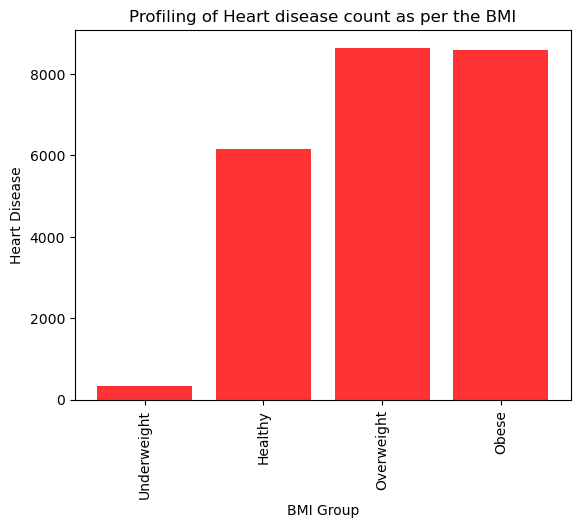

In [86]:
#Bar Chart for BMI vs Heartdisease count
x_axis =heartdisease_count.index.values
x_axis
y_axis = heartdisease_count.values
y_axis
plt.bar(x_axis, y_axis, color='r', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
plt.title("Profiling of Heart disease count as per the BMI")
plt.xlabel("BMI Group")
plt.ylabel("Heart Disease")
plt.xticks(rotation="vertical")
#plt.savefig("/Images/BMI_Heart_Bar.png")
plt.show()



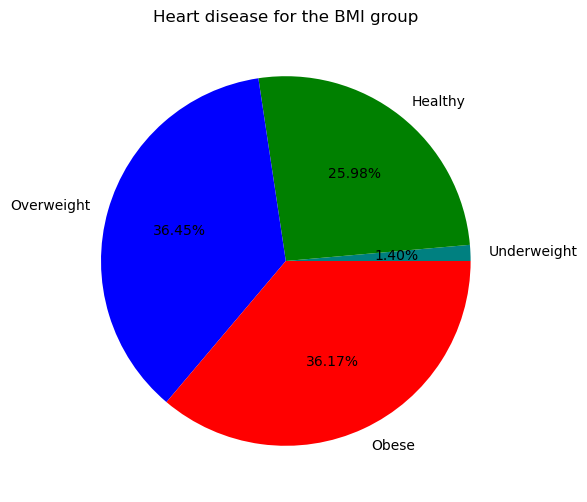

In [17]:
#Pie Chart for BMI with heartdisease
heart_bmi=bmi_heart['BMI_GROUP'].count()
plt.figure(figsize=(10,6))
plt.pie(heart_bmi, labels=['Underweight','Healthy','Overweight','Obese'], autopct='%1.2f%%', colors=['teal','green','blue','red'])
plt.title('Heart disease for the BMI group')
plt.savefig("/Images/BMI_Heart_Pie.png")
plt.show()


In [16]:
# Calculate the BMI  of each BMI_Group 
#BMI_Group = Underweight,Healthy,Overweight,Obese
reduced_data = bmi_heartdisease_df.loc[(bmi_heartdisease_df["BMI_GROUP"] == "Underweight") | (bmi_heartdisease_df["BMI_GROUP"] == "Healthy") |
                                        (bmi_heartdisease_df["BMI_GROUP"] == "Overweight") |(bmi_heartdisease_df["BMI_GROUP"] == "Obese") ]
# Start by getting the last (greatest) timepoint for each mouse
# Capomulin
last_tp = reduced_data.groupby(["BMI_GROUP","BMI"]).last()
new_last_tp = last_tp.reset_index()
reduced_last_tp=new_last_tp[["BMI_GROUP", "BMI"]]
reduced_last_tp

underweight_df= reduced_last_tp.loc[reduced_last_tp["BMI_GROUP"] == "Underweight"]
underweight_df

healthy_df = reduced_last_tp.loc[reduced_last_tp["BMI_GROUP"] == "Healthy"]
healthy_df

overweight_df = reduced_last_tp.loc[reduced_last_tp["BMI_GROUP"] == "Overweight"]
overweight_df

obese_df = reduced_last_tp.loc[reduced_last_tp["BMI_GROUP"] == "Obese"]
obese_df
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_df = pd.DataFrame({"Underweight": underweight_df["BMI"],"Healthy": healthy_df["BMI"],"Overweight": overweight_df["BMI"],"OBese": obese_df["BMI"]})

new_df

,Underweight,Healthy,Overweight,OBese
0,12.0,NaN,NaN,NaN
1,13.0,NaN,NaN,NaN
2,14.0,NaN,NaN,NaN
3,15.0,NaN,NaN,NaN
4,16.0,NaN,NaN,NaN
...,...,...,...,...
283,NaN,NaN,NaN,87.0
284,NaN,NaN,NaN,90.0
285,NaN,NaN,NaN,92.0
286,NaN,NaN,NaN,95.0


In [17]:
#General Health and Diabetes
generalhealth_diabetes_df = health_indicator_df[["Diabetes_binary","GenHlth"]]
generalhealth_diabetes_df

genhlth_diabetes= generalhealth_diabetes_df
#set range for GenHlth
bins = [0,1,2,3,4,5]
#name the ranges
group_names=['Excellent','Very good','Good','Fair','Poor']
#new column
genhlth_diabetes['GenHlth_GROUP']=pd.cut( generalhealth_diabetes_df['GenHlth'],bins,labels=group_names)

genhlth_diabetes


C:\Users\61452\AppData\Local\Temp\ipykernel_29080\1464989026.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genhlth_diabetes['GenHlth_GROUP']=pd.cut( generalhealth_diabetes_df['GenHlth'],bins,labels=group_names)


,Diabetes_binary,GenHlth,GenHlth_GROUP
0,0.0,5.0,Poor
1,0.0,3.0,Good
2,0.0,5.0,Poor
3,0.0,2.0,Very good
4,0.0,2.0,Very good
...,...,...,...
253675,0.0,3.0,Good
253676,1.0,4.0,Fair
253677,0.0,1.0,Excellent
253678,0.0,3.0,Good


In [18]:
#filter to only Diabetes
genhlth_diabetes_df = genhlth_diabetes.loc[genhlth_diabetes['Diabetes_binary'] == 1]
genhlth_diabetes_df = genhlth_diabetes_df.loc[:, ["Diabetes_binary","GenHlth","GenHlth_GROUP"]]
genhlth_diabetes_df





,Diabetes_binary,GenHlth,GenHlth_GROUP
8,1.0,5.0,Poor
10,1.0,3.0,Good
13,1.0,4.0,Fair
17,1.0,2.0,Very good
23,1.0,1.0,Excellent
...,...,...,...
253659,1.0,4.0,Fair
253668,1.0,2.0,Very good
253670,1.0,5.0,Poor
253676,1.0,4.0,Fair


In [19]:
#group by GenHlth_Group
genhlth_diabetes = genhlth_diabetes_df.groupby('GenHlth_GROUP')

genhlth_diabetes_count= genhlth_diabetes['GenHlth_GROUP'].count()
genhlth_diabetes_count



GenHlth_GROUP
Excellent     1135
Very good     6280
Good         13324
Fair          9781
Poor          4577
Name: GenHlth_GROUP, dtype: int64

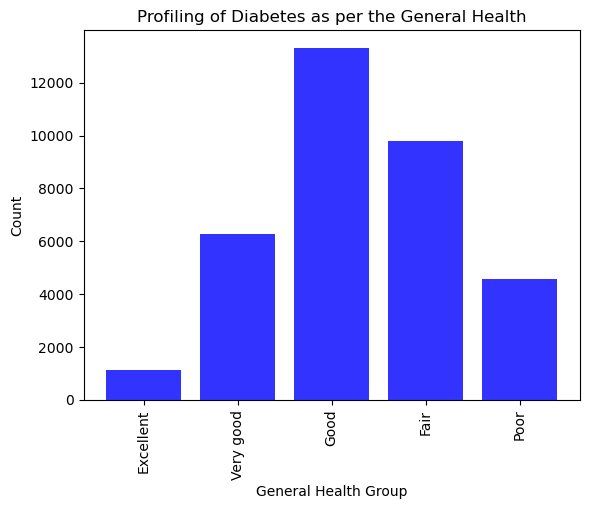

In [20]:
#Bar Chart for the General health group with Diabetes count

x_axis =genhlth_diabetes_count.index.values
x_axis
y_axis = genhlth_diabetes_count.values
y_axis
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
plt.title("Profiling of Diabetes as per the General Health")
plt.xlabel("General Health Group")
plt.ylabel("Count")
plt.xticks(rotation="vertical")
plt.show()

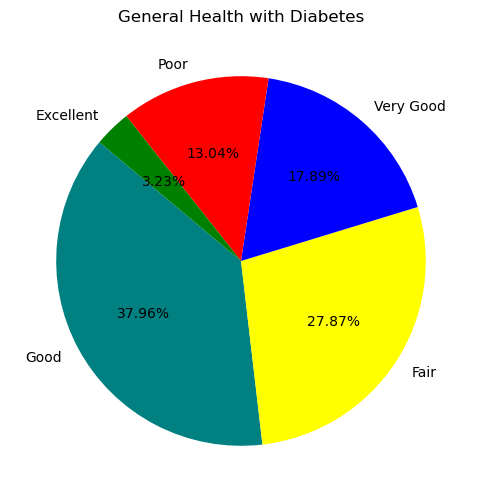

In [21]:
#Pie Chart for the General Health with Diabetes
genhlth_diabetes_df['GenHlth'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(genhlth_diabetes_df['GenHlth'].value_counts(), labels=['Good','Fair','Very Good','Poor','Excellent'], autopct='%1.2f%%', colors=['teal','yellow','blue','red','green'],startangle=140)
plt.title('General Health with Diabetes')
plt.show()


In [22]:
#Analysis of People with Diabetes and HeartDisease compared with the General Health 

#Concatenating the Dataframe 
Heart_Diabetes_GenHlth = pd.concat([bmi_heartdisease_df,genhlth_diabetes_df],axis=1, join="inner")
Heart_Diabetes_GenHlth = Heart_Diabetes_GenHlth.drop(['BMI_GROUP','BMI','Diabetes_binary','HeartDiseaseorAttack' ],axis=1)

#Group by GenHlt_group and get the count of the people with Diabetes and Heart Disease
genhlth_heart_diabetes = Heart_Diabetes_GenHlth.groupby('GenHlth_GROUP')

genhlth_heart_diabetes_count= genhlth_heart_diabetes['GenHlth_GROUP'].count()
genhlth_heart_diabetes_count

#Heart_Diabetes_GenHlth['GenHlth_GROUP'].value_counts()
#GenHlth_GROUP
#Fair         2626
#Good         2312
#Poor         1989
#Very good     781
#Excellent     148

GenHlth_GROUP
Excellent     148
Very good     781
Good         2312
Fair         2626
Poor         1989
Name: GenHlth_GROUP, dtype: int64

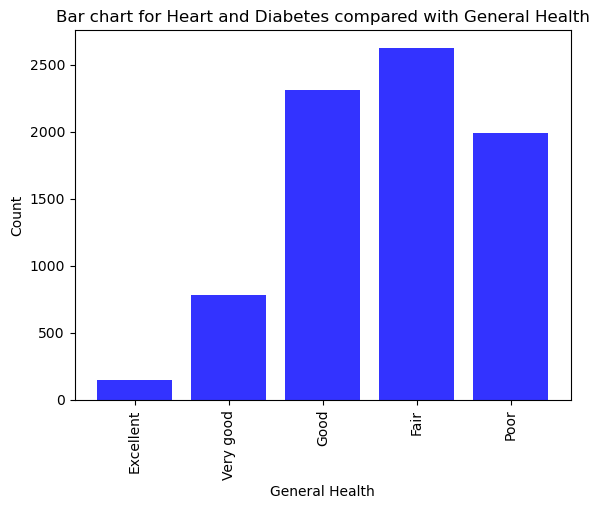

In [23]:
#Bar chart for Heart and Diabetes Vs Genhlt

x_axis =genhlth_heart_diabetes_count.index.values
x_axis
y_axis =genhlth_heart_diabetes_count.values
y_axis
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
plt.xlabel("General Health")
plt.ylabel("Count")
plt.xticks(rotation="vertical")
plt.title("Bar chart for Heart and Diabetes compared with General Health")
plt.show()

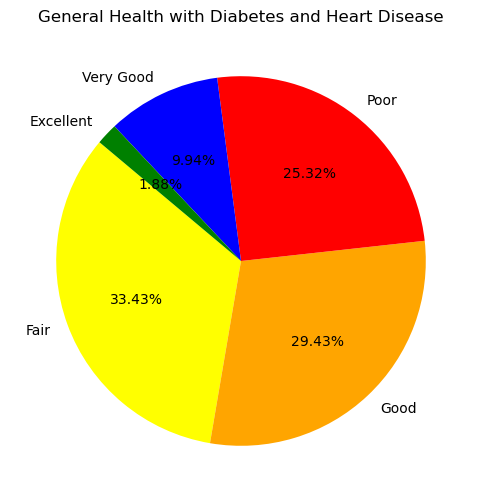

In [24]:
#Pie Chart for the General Health with Diabetes and HeartDisease
Heart_Diabetes_GenHlth['GenHlth_GROUP'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(Heart_Diabetes_GenHlth['GenHlth_GROUP'].value_counts(), labels=['Fair','Good','Poor','Very Good','Excellent'], autopct='%1.2f%%', colors=['yellow','orange','red','blue','green'],startangle=140)
plt.title('General Health with Diabetes and Heart Disease')
plt.show()

In [29]:
# find the  count of people having Heart disease and is Smoker
heart_smoker_df = health_indicator_df[["Smoker","HeartDiseaseorAttack"]]
heart_smoker = heart_smoker_df.loc[((heart_smoker_df["Smoker"] == 1) & (heart_smoker_df["HeartDiseaseorAttack"] ==1))]
heart_smoke=heart_smoker.drop(["Smoker"],axis=1)
smoker=heart_smok["HeartDiseaseorAttack"].count()

#find the  count of people having Heart disease and is drinker

heart_drink_df = health_indicator_df[["HvyAlcoholConsump","HeartDiseaseorAttack"]]
heart_drinker =  heart_drink_df.loc[((heart_drink_df["HvyAlcoholConsump"] == 1) & (heart_drink_df["HeartDiseaseorAttack"] ==1))]
heart_drink= heart_drinker.drop(["HvyAlcoholConsump"],axis=1)
drinker=heart_drink["HeartDiseaseorAttack"].count()
drinker


#find the  count of people having Heart disease and have high cholesterol

heart_chol_df = health_indicator_df[["HighChol","HeartDiseaseorAttack"]]
heart_chols=  heart_chol_df.loc[((heart_chol_df["HighChol"] == 1) & (heart_chol_df["HeartDiseaseorAttack"] ==1))]
heart_chol =  heart_chols.drop(["HighChol"],axis=1)
chol=heart_chol["HeartDiseaseorAttack"].count()
chol
 

#find the  count of people having Heart disease and have high BP
heart_bp_df =health_indicator_df[["HighBP","HeartDiseaseorAttack"]]
heart_bps =  heart_bp_df.loc[((heart_bp_df ["HighBP"] == 1) & (heart_bp_df ["HeartDiseaseorAttack"] ==1))]
heart_bp= heart_bps.drop(["HighBP"],axis=1)
bp = heart_bp["HeartDiseaseorAttack"].count()
bp


#find the  count of people having Heart disease and Chol Check
heart_cholcheck_df=health_indicator_df[["CholCheck","HeartDiseaseorAttack"]]
heart_chols =  heart_cholcheck_df.loc[((heart_cholcheck_df["CholCheck"] == 1) & (heart_cholcheck_df["HeartDiseaseorAttack"] ==1))]
heart_cholcheck = heart_chols.drop(["CholCheck"],axis=1)
chol_check=heart_cholcheck["HeartDiseaseorAttack"].count()




#find the  count of people having Heart disease and physicalactivity

heart_physical_activity_df = health_indicator_df[["PhysActivity","HeartDiseaseorAttack"]]
heart_physical_activity = heart_physical_activity_df.loc[((heart_physical_activity_df["PhysActivity"] == 1) & (heart_physical_activity_df["HeartDiseaseorAttack"] ==1))]
heart_phy_act= heart_physical_activity.drop(["PhysActivity"],axis=1)
PhysActivity=df7_2["HeartDiseaseorAttack"].count()






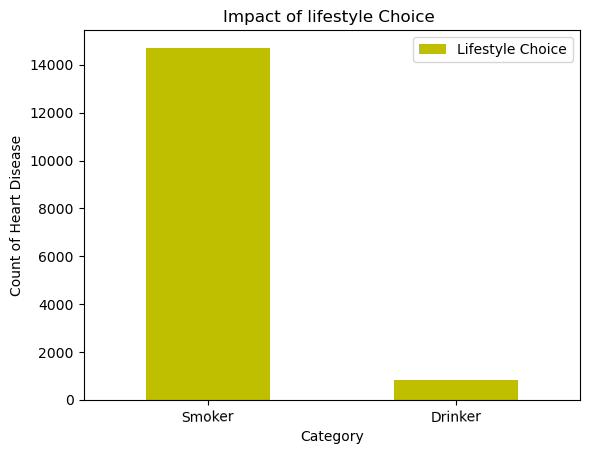

In [45]:
#Bar chart for people who drink and smoke and have heart disease

heart_smoke_drink = pd.DataFrame({'Category':['Smoker', 'Drinker'], 'Lifestyle Choice':[smoker,drinker]})
h_s_d = heart_smoke_drink.plot.bar(x='Category', y = 'Lifestyle Choice', rot=1,ylabel='Count of Heart Disease',title='Impact of lifestyle Choice ',color = 'y')





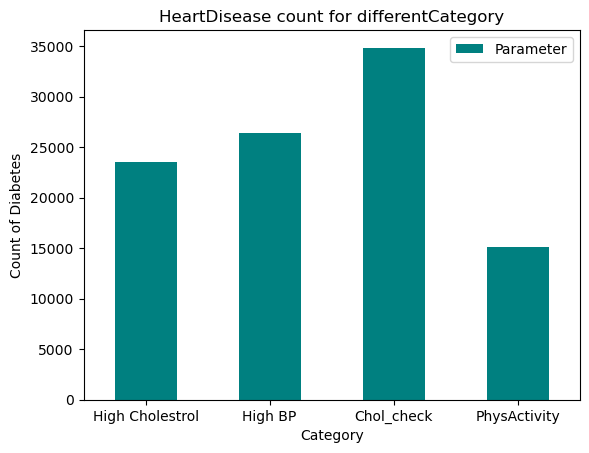

In [81]:
# find the count for Heart disease & High Cholestrol,High BP,Chol_Check,Physical Activity
 
df_all_H_2= pd.DataFrame({'Category':['High Cholestrol','High BP','Chol_check','PhysActivity'], 'Parameter':[high_Chol, high_BP,Chol_check,PhysActivity]})
ax_H_2 = df_all_H_2.plot.bar(x='Category', y='Parameter', rot=0,title='HeartDisease count for differentCategory',ylabel='Count of Diabetes',color='teal')

In [84]:
# find the  count of people having diabetes and is Smoker

diabetes_smoker_df = health_indicator_df[["Smoker","Diabetes_binary"]]
diabetes_smoker = diabetes_smoker_df.loc[((diabetes_smoker_df["Smoker"] == 1) & (diabetes_smoker_df["Diabetes_binary"] ==1))]
diabetes_smoke=diabetes_smoker.drop(["Smoker"],axis=1)
db_smoker=diabetes_smoke["Diabetes_binary"].count()

#find the  count of people having diabetes and is drinker

diabetes_drink_df = health_indicator_df[["HvyAlcoholConsump","Diabetes_binary"]]
diabetes_drinker =  diabetes_drink_df.loc[((diabetes_drink_df["HvyAlcoholConsump"] == 1) & (diabetes_drink_df["Diabetes_binary"] ==1))]
diabetes_drink= diabetes_drinker.drop(["HvyAlcoholConsump"],axis=1)
db_drinker=diabetes_drink["Diabetes_binary"].count()
db_drinker


#find the  count of people having diabetes and have high cholesterol

diabetes_chol_df = health_indicator_df[["HighChol","Diabetes_binary"]]
diabetes_chols=  diabetes_chol_df.loc[((heart_chol_df["HighChol"] == 1) & (diabetes_chol_df["Diabetes_binary"] ==1))]
diabetes_chol =  diabetes_chols.drop(["HighChol"],axis=1)
db_chol=diabetes_chol["Diabetes_binary"].count()

 

#find the  count of people having diabetes and have high BP
diabetes_bp_df =health_indicator_df[["HighBP","Diabetes_binary"]]
diabetes_bps = diabetes_bp_df.loc[((diabetes_bp_df ["HighBP"] == 1) & (diabetes_bp_df ["Diabetes_binary"] ==1))]
diabetes_bp= diabetes_bps.drop(["HighBP"],axis=1)
db_bp = diabetes_bp["Diabetes_binary"].count()



#find the  count of people having diabetes and Chol Check
diabetes_cholcheck_df=health_indicator_df[["CholCheck","Diabetes_binary"]]
diabetes_chols =  diabetes_cholcheck_df.loc[((diabetes_cholcheck_df["CholCheck"] == 1) & (diabetes_cholcheck_df["Diabetes_binary"] ==1))]
diabetes_cholcheck = diabetes_chols.drop(["CholCheck"],axis=1)
db_chol_check=diabetes_cholcheck["Diabetes_binary"].count()




#find the  count of people having diabetes and physicalactivity

diabetes_physical_activity_df = health_indicator_df[["PhysActivity","Diabetes_binary"]]
diabetes_physical_activity = diabetes_physical_activity_df.loc[((diabetes_physical_activity_df["PhysActivity"] == 1) & (diabetes_physical_activity_df["Diabetes_binary"] ==1))]
diabetes_phy_act= diabetes_physical_activity.drop(["PhysActivity"],axis=1)
db_PhysActivity=diabetes_phy_act["Diabetes_binary"].count()




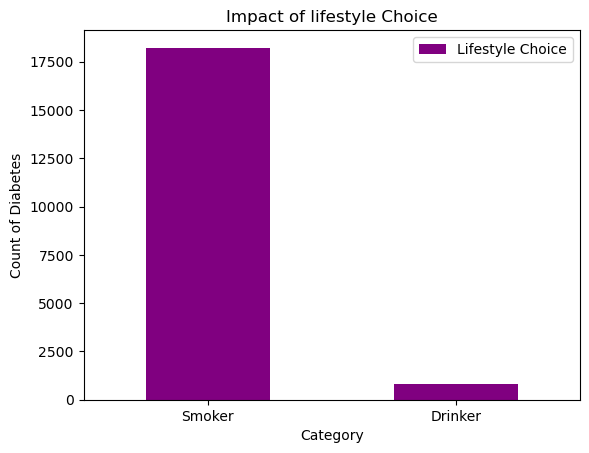

In [80]:
db_S_P= pd.DataFrame({'Category':['Smoker', 'Drinker'], 'Lifestyle Choice':[db_smoker, db_drinker]})
ax_1 = df_all_1.plot.bar(x='Category', y='Lifestyle Choice', rot=0,ylabel='Count of Diabetes',title = 'Impact of lifestyle Choice',color = 'purple')

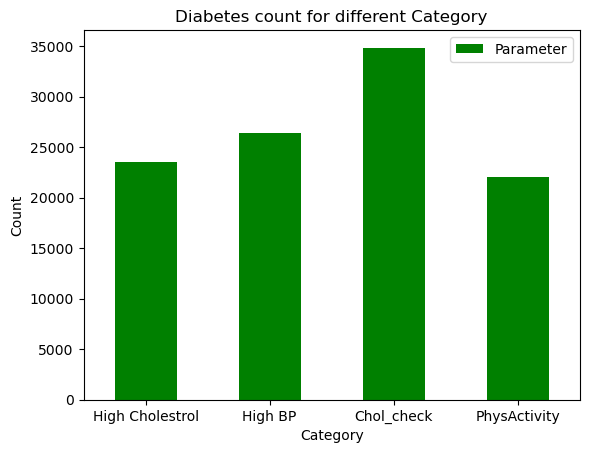

In [85]:
df_all_2 = pd.DataFrame({'Category':['High Cholestrol', 'High BP','Chol_check','PhysActivity'], 'Parameter':[db_chol, db_bp,db_chol_check,db_PhysActivity]})
ax_2 = df_all_2.plot.bar(x='Category', y='Parameter', rot=0,title='Diabetes count for different Category',ylabel='Count',color = 'green')  


<Axes: title={'center': 'BMI'}, xlabel='HeartDiseaseorAttack'>

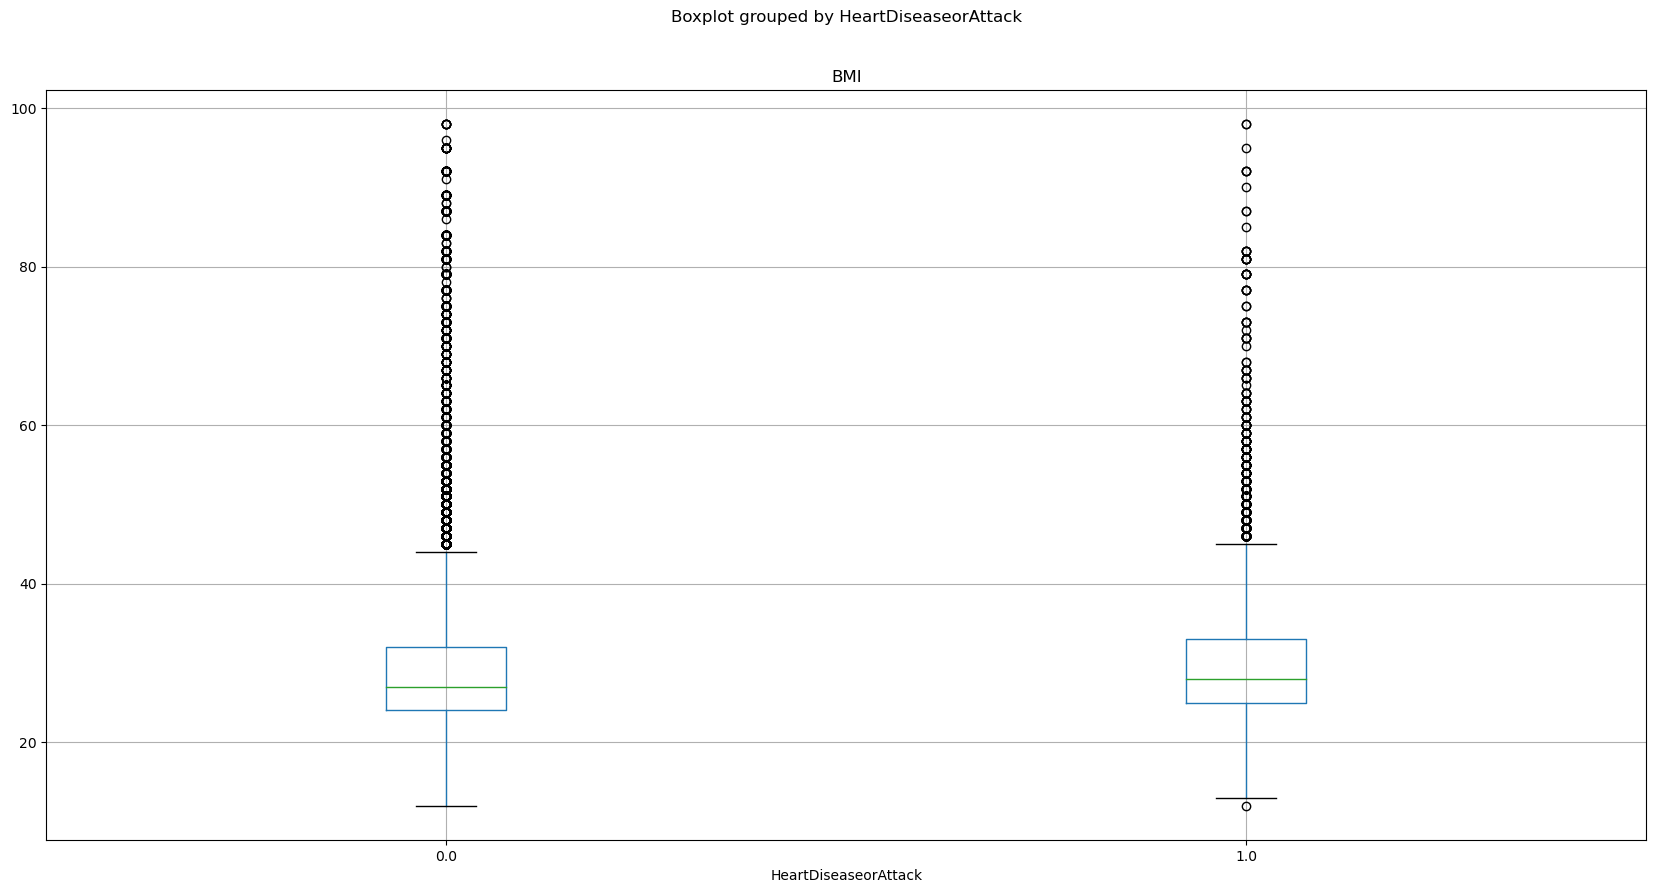

In [35]:
#Pvalue for the BMI_Heart Disease

bmi_heart_df.boxplot("BMI" ,by="HeartDiseaseorAttack", figsize=(20, 10))

In [526]:
group0 = bmi_heart_df[bmi_heart_df["HeartDiseaseorAttack"] == 0.0]["BMI"]
group1 = bmi_heart_df[bmi_heart_df["HeartDiseaseorAttack"] == 1.0]["BMI"]

st.f_oneway(group0, group1)

F_onewayResult(statistic=364.4417363206218, pvalue=3.5119204422859346e-81)

In [547]:
#pvalue for Heartdisease and Alchohol
group0 =df2[bmi_heart_df["HeartDiseaseorAttack"] == 0.0]["HvyAlcoholConsump"]
group1 = df2[bmi_heart_df["HeartDiseaseorAttack"] == 1.0]["HvyAlcoholConsump"]
st.f_oneway(group0, group1)

F_onewayResult(statistic=290.5556678012992, pvalue=4.127304554794769e-65)